**1.** Consider a periodic square wave with time period T = 2 seconds having
magnitude 1 between t = 0 s and t = 1 s and zero elsewhere. Let g(t) be
the Fourier series representation of the square wave.

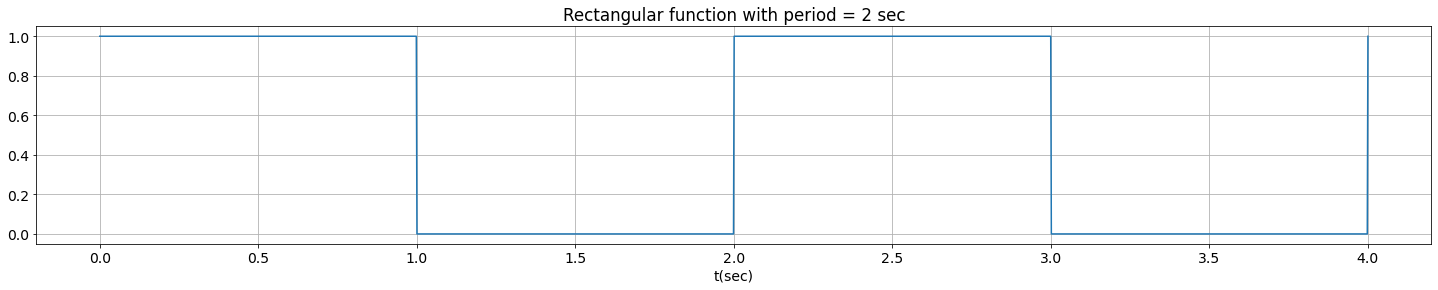

In [95]:
import numpy as np
import matplotlib.pyplot as plt


def c_rect(n):  #function to create a continuous periodic rectangular function
  rect=[]
  for i in list(n):
    if (int(i)%2)==0:
      rect.append(1)
    else:
      rect.append(0)
  return rect

N=4
samples_per_len=500
t=np.linspace(0,N,samples_per_len*N)
rect=c_rect(t)
plt.figure(figsize=(25,4))
plt.plot(t,rect)
plt.xlabel('t(sec)')
plt.title(f'Rectangular function with period = 2 sec')
plt.grid()
plt.show()



(a) Define a function so that you can easily plot g(t) for different numbers of coefficients on the same graph. This plot is useful to see the
emergence of the square wave as the number of terms in the representation increases.

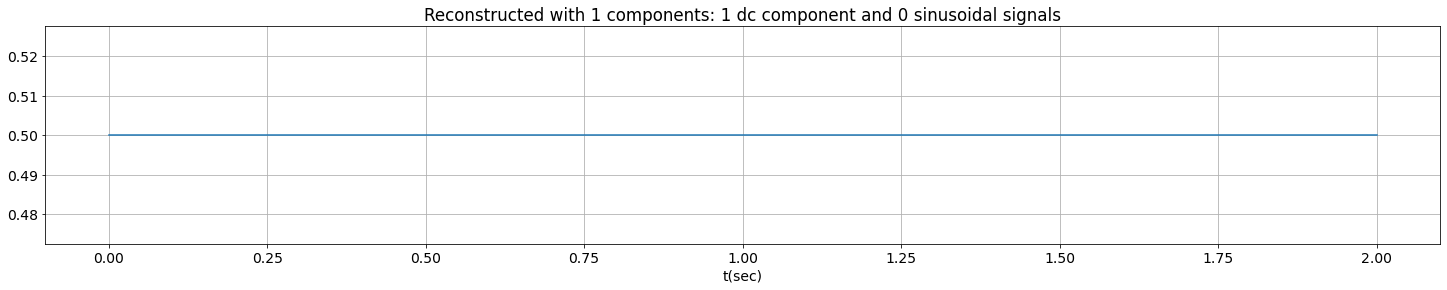

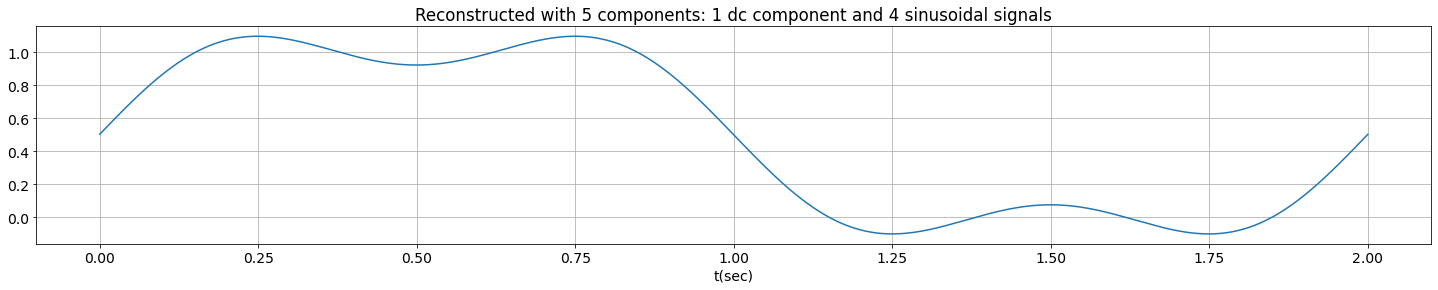

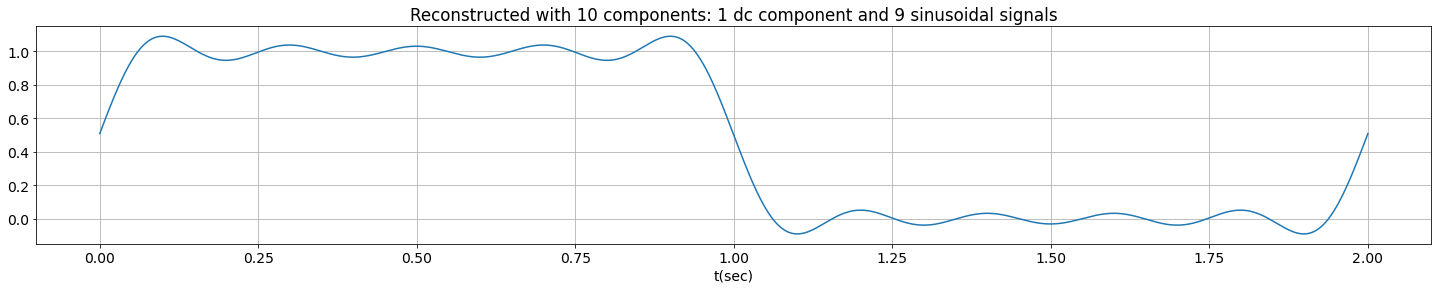

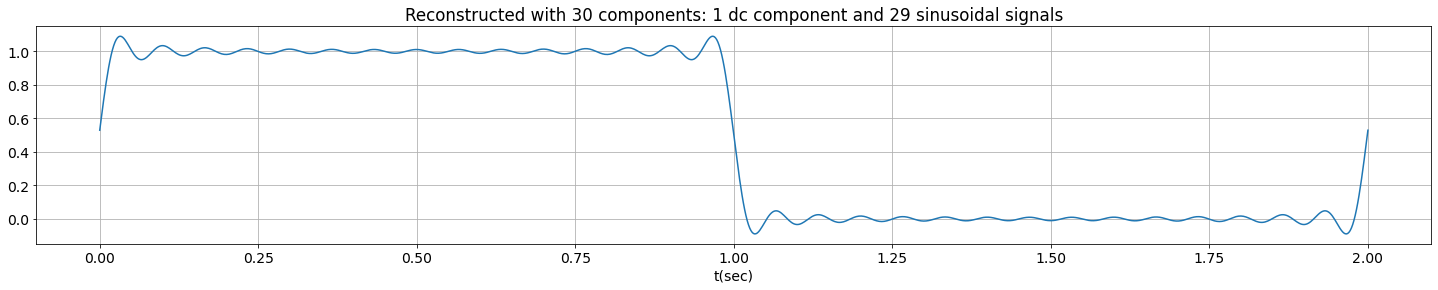

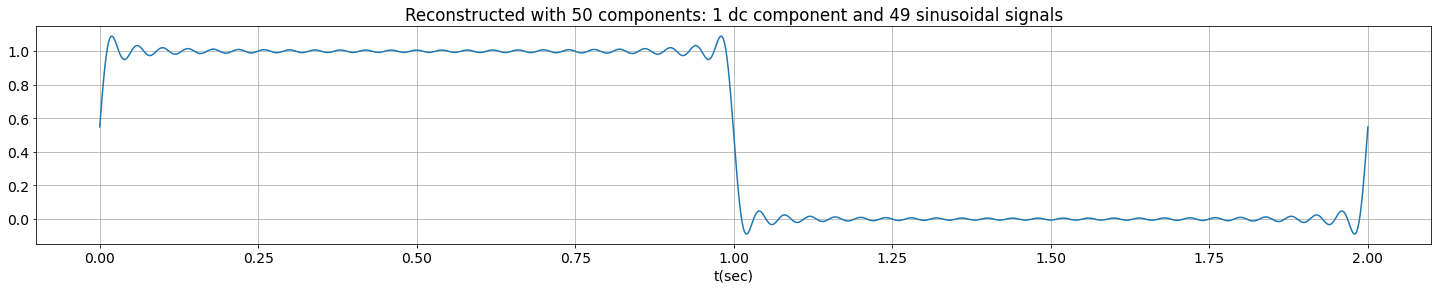

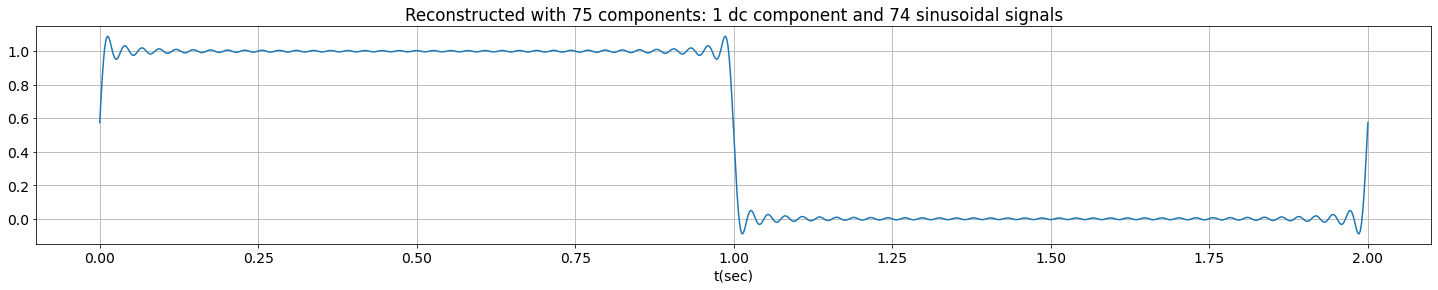

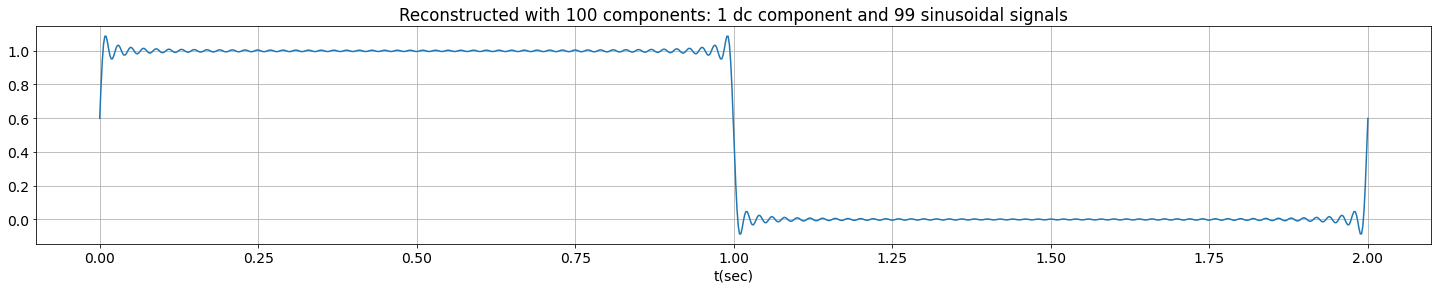

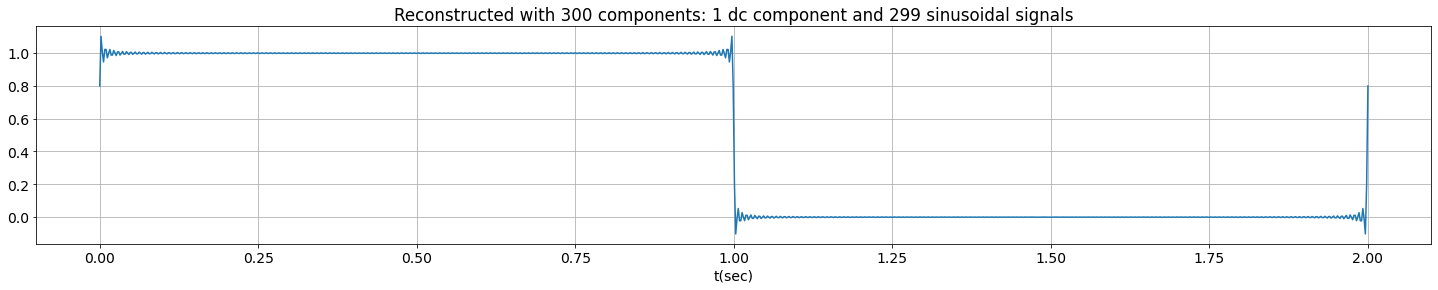

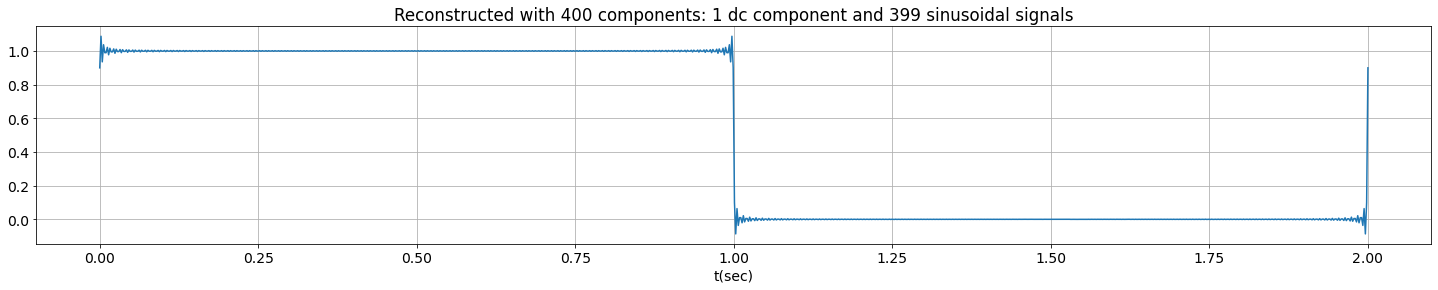

In [96]:
import cmath

def integ(x,t):    # function to integrate x(t) with respect to t using trapezoidal rule
  import numpy as np
  sum=0
  integ_value=np.trapz(x,dx=1/samples_per_len)
  return np.array(integ_value)

def ak(x,k,To,t):   # to calculate Fourier series coefficient ak for the kth exponential component
  assert len(t)/samples_per_len==To
  assert len(x)/samples_per_len==To
  wo=(2*np.pi)/To
  e_comp=[]
  for i in list(t):  
    e_comp.append(np.exp(complex(0,-k*wo*i)))   # creating the term e^(-j k wo t)
  e_comp=np.array(e_comp)
  return integ(x*e_comp,t)/To  # ak = 1/To * integration (x(t) * e^(-j k wo t)) from 0 to To


def g(x,k,To,t,num_comp):   # to reconstruct the original signal partially using 'num_comp' number of exponential components
  a=[]

  for i in range(num_comp):
    if i==0:
      a.append(ak(x,i,To,t))    # calculate ak for dc component
    else:
      a.append(ak(x,i,To,t))     # calculate ak for positive frequency
      a.append(ak(x,-i,To,t))    # calculate ak for negative frequency
  recon_signal=np.ndarray((1,len(x)))

  count=0
  for i in range(num_comp):   # reconstructing the signal adding the components one-by-one
    wo=(2*np.pi)/To
    if i==0:      # DC component
      e_comp=[]
      for j in list(t):  
        e_comp.append(np.exp(complex(0,i*wo*j)))
      e_comp=np.reshape(a[count]*np.array(e_comp),(1,samples_per_len*To))   
      count=count+1
      recon_signal=np.add(recon_signal,e_comp)
    else:   # exponential components
      e_comp=[]
      for j in list(t):  
        e_comp.append(np.exp(complex(0,i*wo*j)))
      e_comp=a[count]*np.array(e_comp) #multiplying the exponential component by the coefficient from 'a' array
      recon_signal=np.add(recon_signal,e_comp) 
      count=count+1
      e_comp=[]
      for j in list(t):  
        e_comp.append(np.exp(complex(0,-i*wo*j)))
      e_comp=a[count]*np.array(e_comp)
      recon_signal=np.add(recon_signal,e_comp)
      count=count+1
  return recon_signal

N=2
samples_per_len=500
t=np.linspace(0,N,samples_per_len*N)
rect=c_rect(t)  # generating the rectangle function
To=2
number_of_coefficients=[1,5,10,30,50,75,100,300,400]    # various number of coefficients to try out
for k in number_of_coefficients:
  recon=g(rect,0,To,t,num_comp=k)
  plt.rcParams.update({'font.size':14})
  plt.figure(figsize=(25,4))
  plt.plot(t,(recon.T).real)
  plt.xlabel('t(sec)')
  plt.title(f'Reconstructed with {k} components: 1 dc component and {k-1} sinusoidal signals')
  plt.grid()
  plt.show()


(b) What happens to the Gibbs phenomenon when the number of
terms becomes large?

**Ans** For continuous periodic signals, a sufficiently large number of harmonics can be used to approximate the signal reasonably well. For periodic signals with discontinuities, however, such as a periodic square wave, even a large number of harmonics will not be sufficient to reproduce the square wave exactly. This effect is known as Gibbs phenomenon and it manifests itself in the form of ripples of increasing frequency and an overshoot (as well as an undershoot) closer to the transitions of the square signal.

The overshoot does not die out as the number of coefficient increases, but approaches a finite limit.The value of t where the maximum overshoot is achieved moves closer and closer to the discontinuity as the number of terms summed increases. 

From a signal processing point of view, the Gibbs phenomenon is the step response of a low-pass filter, and the oscillations are called ringing. Truncating the Fourier series of a periodic signal corresponds to filtering out the higher frequencies by an ideal (brick-wall) low-pass filter. This can be represented as convolution of the original signal with the impulse response of the filter, which is the sinc function. Thus, here the Gibbs phenomenon can be seen as the result of convolving a rectangular function with a sinc function: the oscillations in the sinc function cause the ripples in the output.

**2.** A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is
sampled at 100 times per second for 0.99 seconds and then its DFT is
computed.

In [97]:
import numpy as np

def dft(x,N):
  num_coeff=N
  twiddle_power=complex(0,-(2*np.pi)/N)
  Wn=np.exp(twiddle_power)    # defining the twiddle factor Wn

  dft_coeff=[]    # an empty array to store the dft coefficients
  for k in range(num_coeff):  # calculating the N DFT coefficients
    sum=0
    for i in range(N):        # summing over the N signal sampeles
      sum=sum+(x[i]*(Wn**(i*k)))  # multiplying by the twiddle factor
    dft_coeff.append(sum)   # adding the calculated dft coefficient to the list

  dft_coeff=np.array(dft_coeff)
  return dft_coeff

def idft(X,N):
  num_coeff=N
  twiddle_power=complex(0,-(2*np.pi)/N)
  Wn=np.exp(twiddle_power)   # defining the twiddle factor Wn

  xn=[]    # an empty array to store the signal samples
  for i in range(N): # calculating the N samples
    sum=0
    for k in range(num_coeff):        # summing over the N dft coefficients
      sum=sum+(X[k]*(Wn**(-i*k))) # multiplying by the twiddle factor
    xn.append(sum)   # adding the calculated sample to the list

  xn=np.array(xn)/N
  return xn


(a) Plot the power spectral density and visualize the Spectral Leakage.

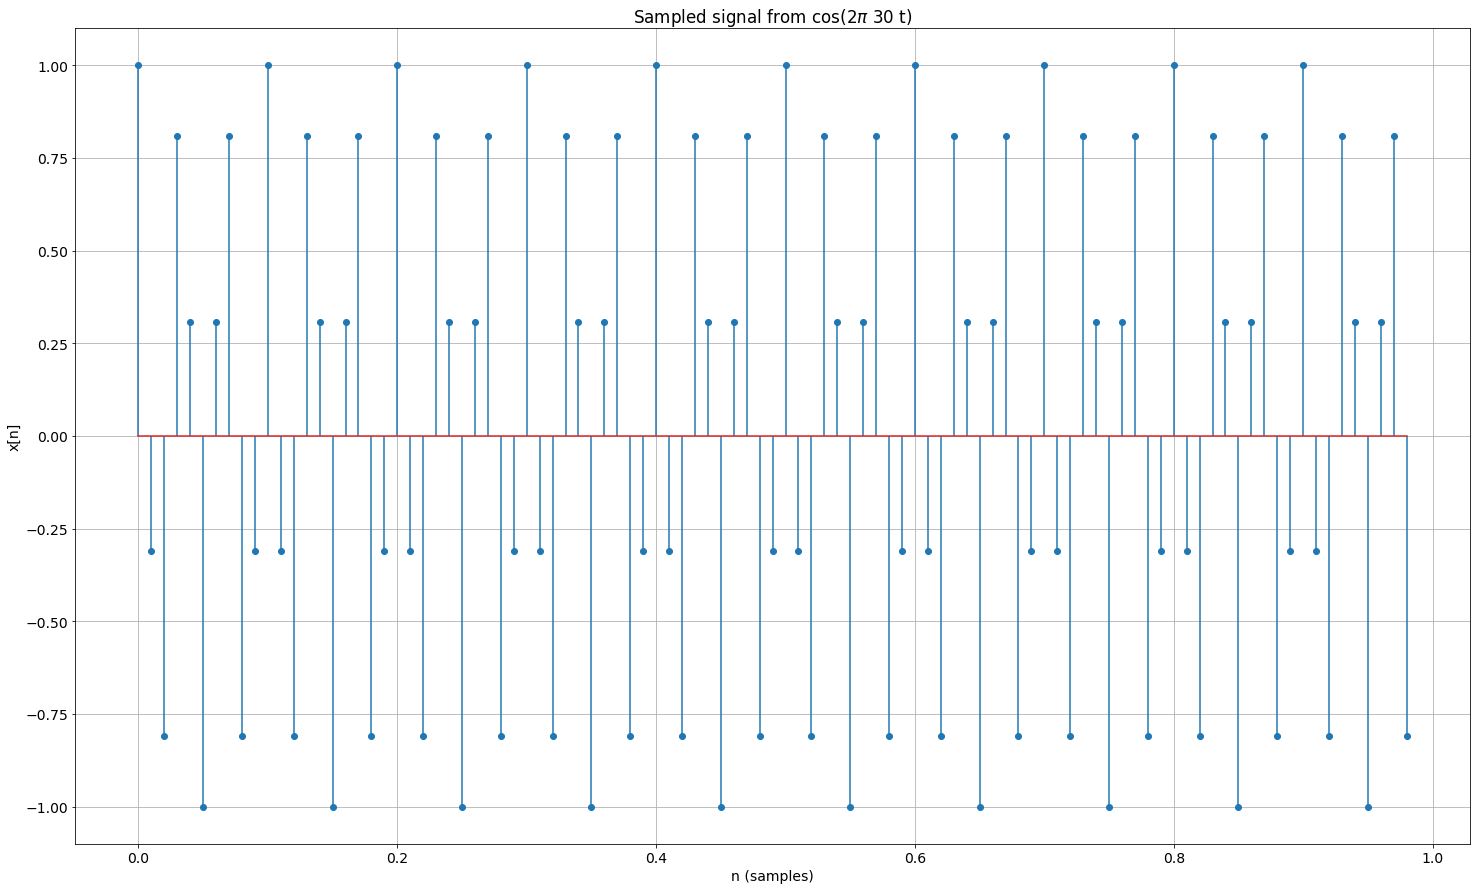

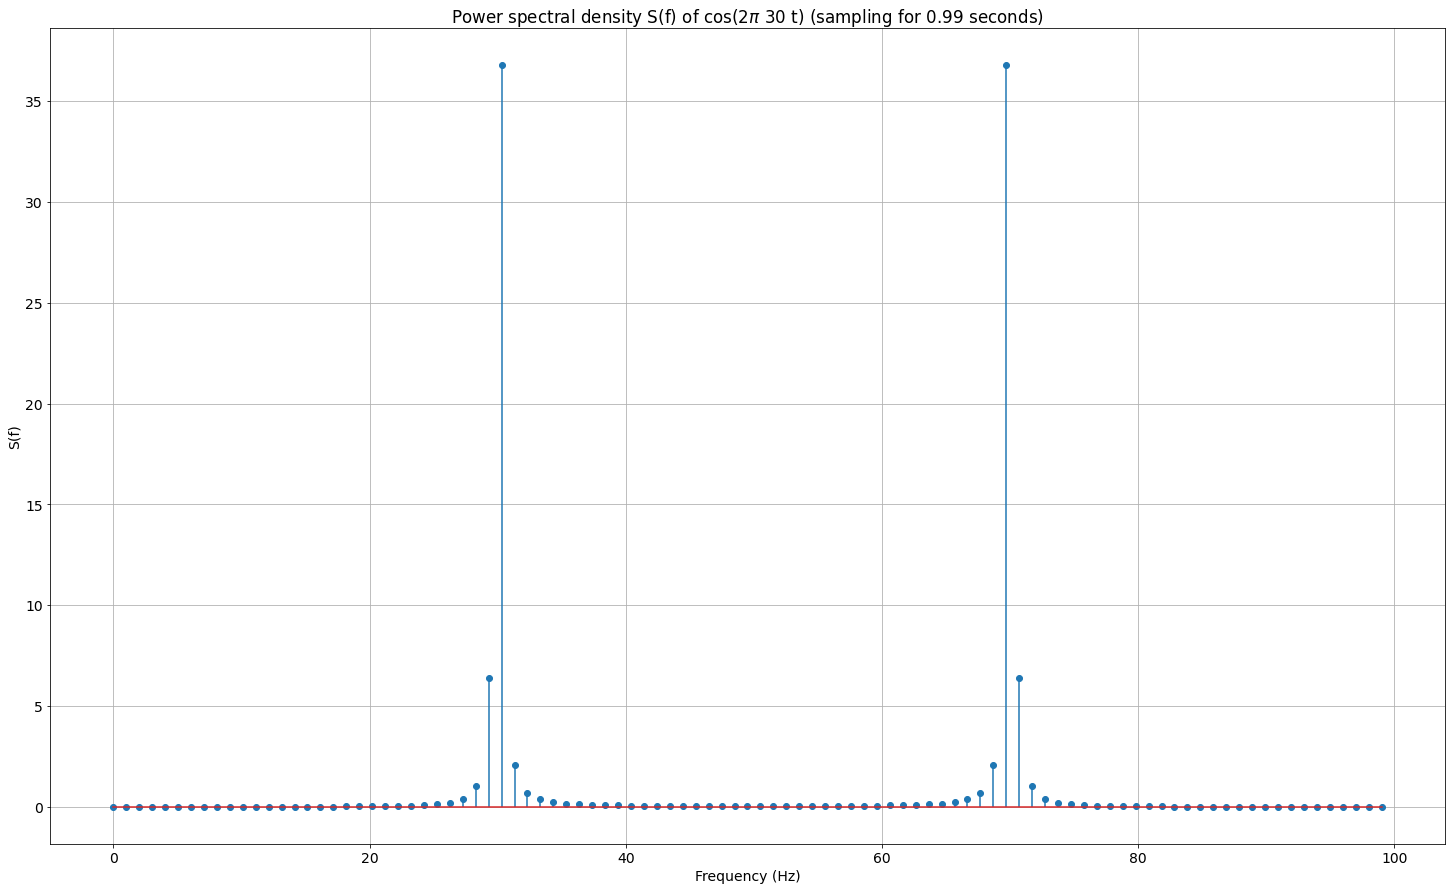

In [109]:
f=30
start=0
end=0.99
samplesPerSec=100
t=np.arange(start,end,1/samplesPerSec)
x=np.cos(2*np.pi*f*t)     # defining the 30 Hz cosine signal for 0.99 seconds

plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,15))
plt.stem(t,x,use_line_collection=True)
plt.xlabel('n (samples)')
plt.ylabel('x[n]')
plt.title(f'Sampled signal from cos(2$\pi$ 30 t)')
plt.grid()
plt.show()


Xk=dft(x,np.shape(x)[0])  # calculate dft of the signal
N=int((end-start)*samplesPerSec)
fs=samplesPerSec

# source: http://www.ee.iitm.ac.in/~skrishna/ee471/dft_lab2.pdf
k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N    # relation between omega_k and k
psd=[]
for i in list(k):
  psd.append(abs(Xk[i])**2) # psd is taken proportional to square of dft coefficients
M=0   # to store mean square value
for i in range(N):
  M=M+(x[i]**2)
M=M/N
psd=np.array(psd)/(N*M)
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,15))
f=(wk*samplesPerSec)/(2*np.pi)
plt.stem(f,psd,use_line_collection=True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('S(f)')
plt.title(f'Power spectral density S(f) of cos(2$\pi$ 30 t) (sampling for 0.99 seconds)')
plt.grid()
plt.show()

**Ans** Here, spectral leakage around f=30 Hz is visible clearly. Spectral leakage occurs when a non-integer number of periods of a signal is sent to the DFT. Spectral leakage lets a single-tone signal be spread among several frequencies after the DFT operation. This makes it hard to find the actual frequency of the signal.

(b) Using various window functions such as Hanning, Hamming, Bartlett
etc. try to minimize the Spectral Leakage. Show the plots in each
case.

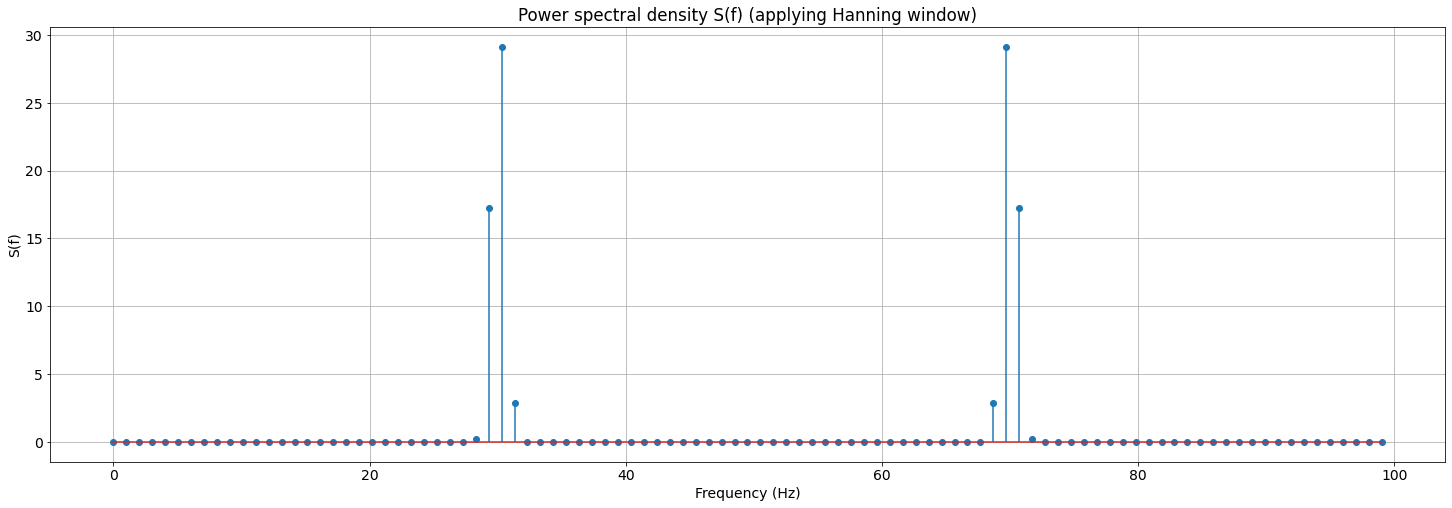

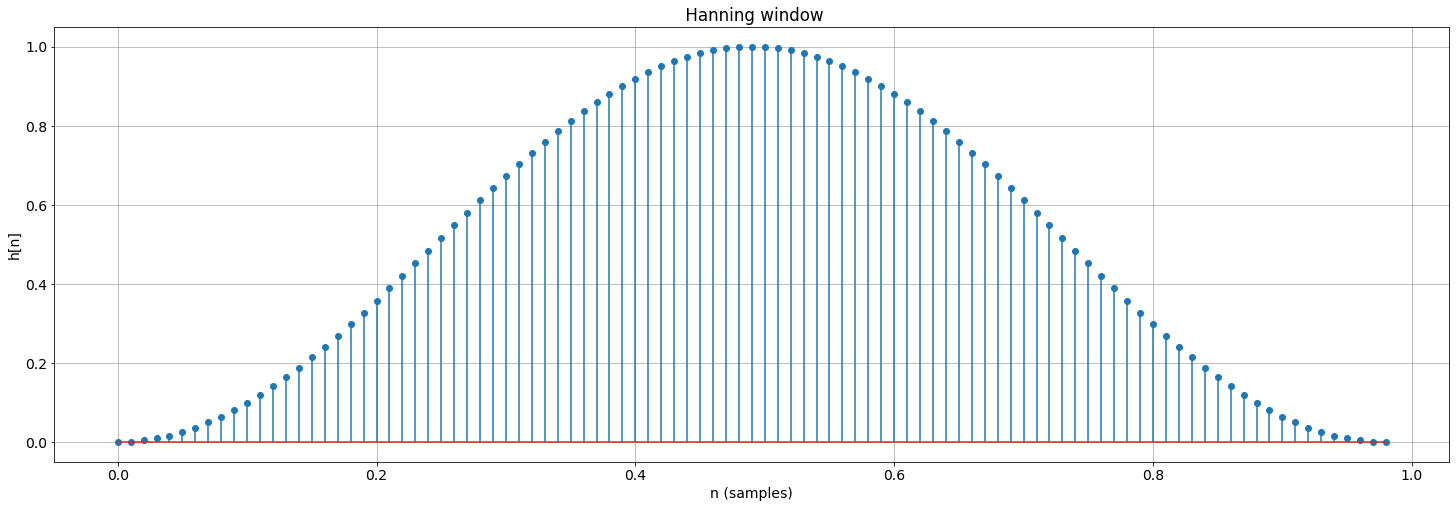

In [99]:
def hanning(M):   # returns a hanning window
  H=[]
  for i in range(M):
    H.append(0.5-0.5*np.cos( (2*np.pi*i)/(M-1) ))
  return np.array(H)

windowed=np.multiply(x,hanning(np.shape(x)[0]))   # applying the window to the signal
Xk=dft(windowed,np.shape(x)[0])  # calculate dft of the signal
N=int((end-start)*samplesPerSec)
fs=samplesPerSec

# source: http://www.ee.iitm.ac.in/~skrishna/ee471/dft_lab2.pdf
k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=[]
for i in list(k):
  psd.append(abs(Xk[i])**2)
M=0
for i in range(N):
  M=M+(windowed[i]**2)
M=M/N
psd=np.array(psd)/(N*M)
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
f=(wk*samplesPerSec)/(2*np.pi)
plt.stem(f,psd,use_line_collection=True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('S(f)')
plt.title(f'Power spectral density S(f) (applying Hanning window)')
plt.grid()
plt.show()
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
plt.stem(np.arange(0,0.99,0.01),hanning(N),use_line_collection=True)
plt.xlabel('n (samples)')
plt.ylabel('h[n]')
plt.title(f' Hanning window')
plt.grid()
plt.show()

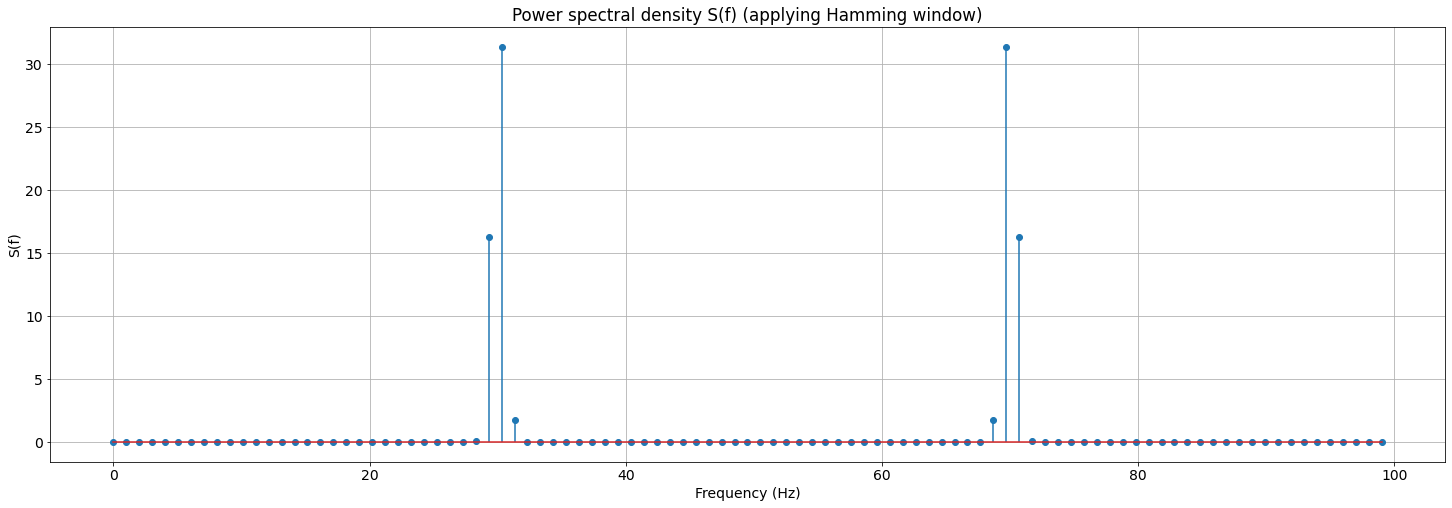

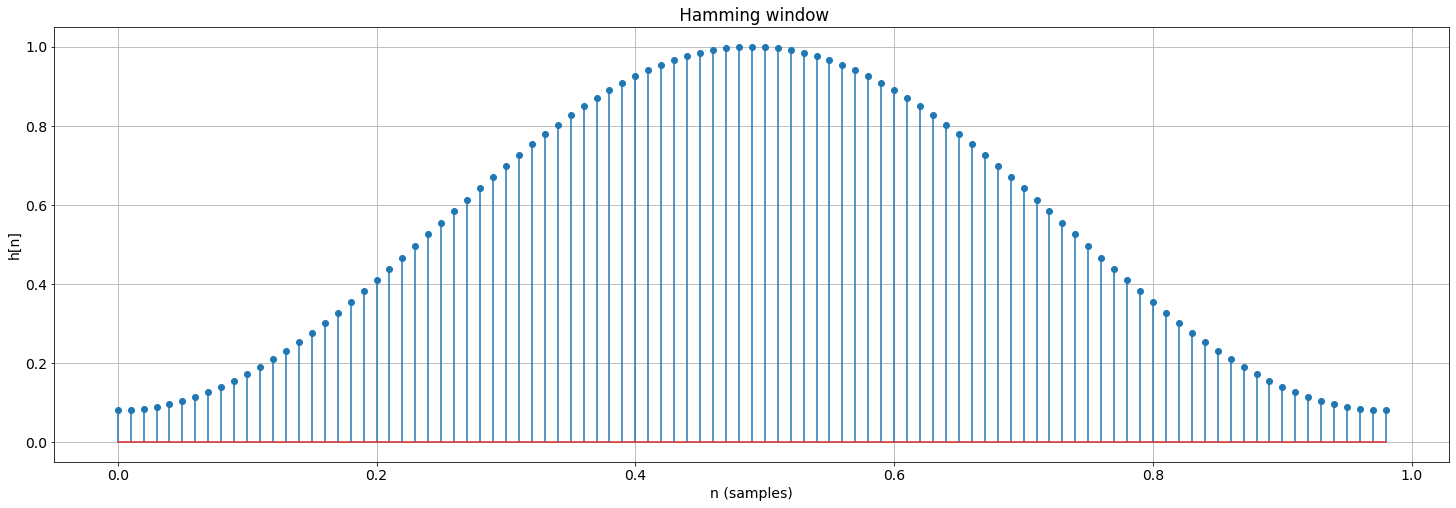

In [100]:
def hamming(M): # returns a hamming window
  H=[]
  for i in range(M):
    H.append(0.54-0.46*np.cos( (2*np.pi*i)/(M-1) ))
  return np.array(H)

windowed=np.multiply(x,hamming(np.shape(x)[0]))

Xk=dft(windowed,np.shape(windowed)[0])  # calculate dft of the signal
N=int((end-start)*samplesPerSec)
fs=samplesPerSec

# source: http://www.ee.iitm.ac.in/~skrishna/ee471/dft_lab2.pdf
k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=[]
for i in list(k):
  psd.append(abs(Xk[i])**2)
M=0
for i in range(N):
  M=M+(windowed[i]**2)
M=M/N
psd=np.array(psd)/(N*M)
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
f=(wk*samplesPerSec)/(2*np.pi)
plt.stem(f,psd,use_line_collection=True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('S(f)')
plt.title(f'Power spectral density S(f) (applying Hamming window)')
plt.grid()
plt.show()
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
plt.stem(np.arange(0,0.99,0.01),hamming(N),use_line_collection=True)
plt.xlabel('n (samples)')
plt.ylabel('h[n]')
plt.title(f' Hamming window')
plt.grid()
plt.show()

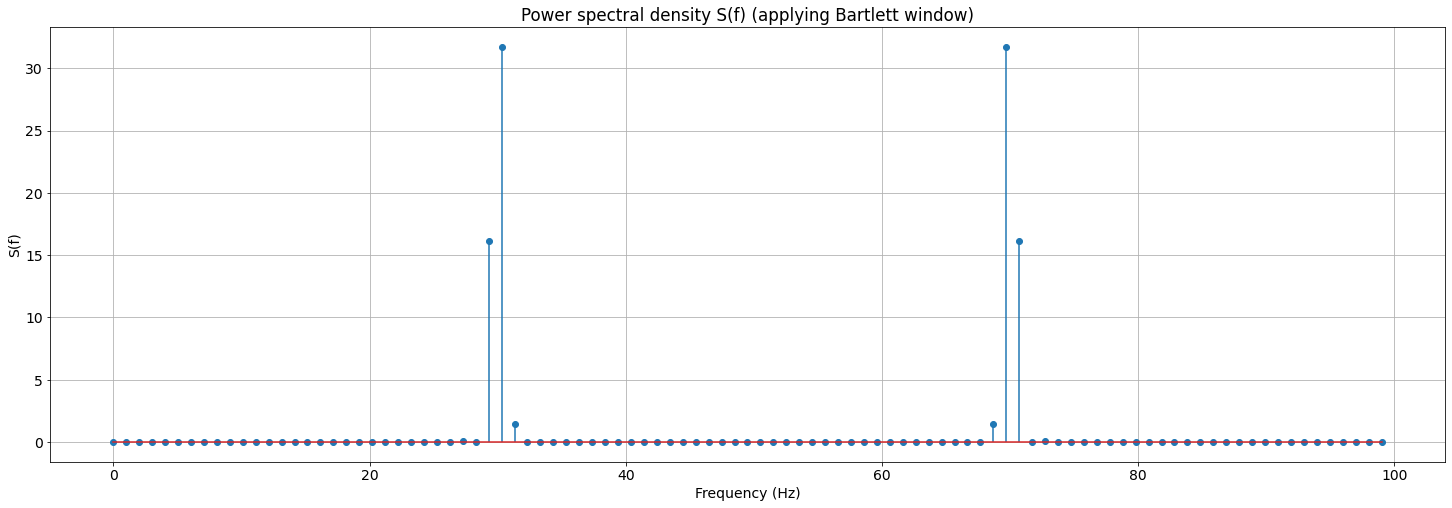

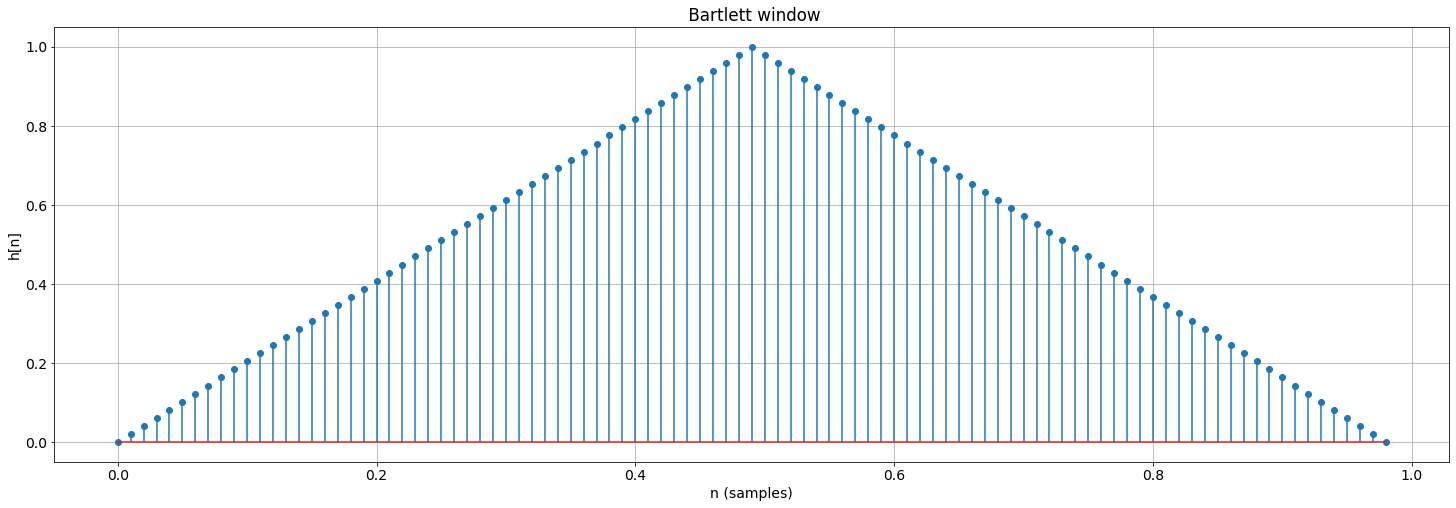

In [101]:
def bartlett(M):  # returns a bartlett window
  B=[]
  m=(M-1)/2
  for i in range(M):
    B.append( (1/m)*(m-abs(i-m)) )
  return np.array(B)

windowed=np.multiply(x,bartlett(np.shape(x)[0]))

Xk=dft(windowed,np.shape(windowed)[0])  # calculate dft of the signal
N=int((end-start)*samplesPerSec)
fs=samplesPerSec

# source: http://www.ee.iitm.ac.in/~skrishna/ee471/dft_lab2.pdf
k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=[]
for i in list(k):
  psd.append(abs(Xk[i])**2)
M=0
for i in range(N):
  M=M+(windowed[i]**2)
M=M/N
psd=np.array(psd)/(N*M)
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
f=(wk*samplesPerSec)/(2*np.pi)
plt.stem(f,psd,use_line_collection=True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('S(f)')
plt.title(f'Power spectral density S(f) (applying Bartlett window)')
plt.grid()
plt.show()
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
plt.stem(np.arange(0,0.99,0.01),bartlett(N),use_line_collection=True)
plt.xlabel('n (samples)')
plt.ylabel('h[n]')
plt.title(f' Bartlett window')
plt.grid()
plt.show()

**3.** Consider the signal x(t) = cos(2πf1t) + cos(2πf2t) where f1 = 10 Hz and
f2 = 30 Hz. The signal y(t) is the noisy version of x(t) when x(t) is
corrupted with white noise having zero mean and unit variance.

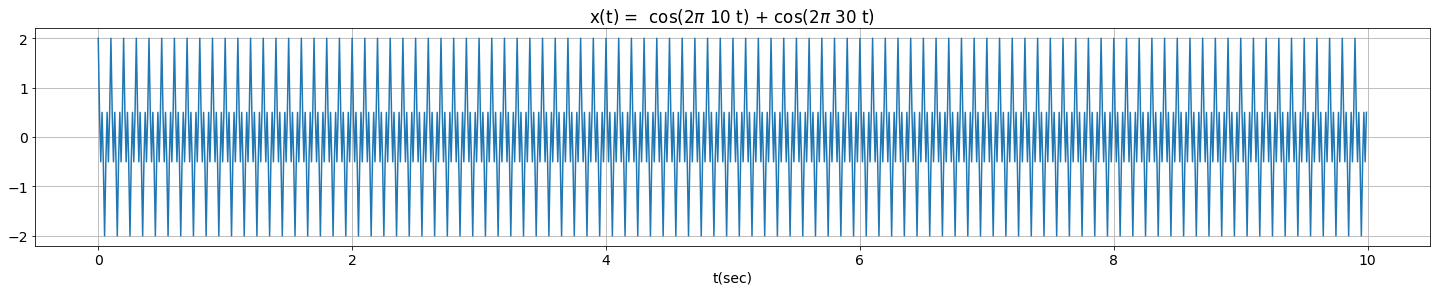

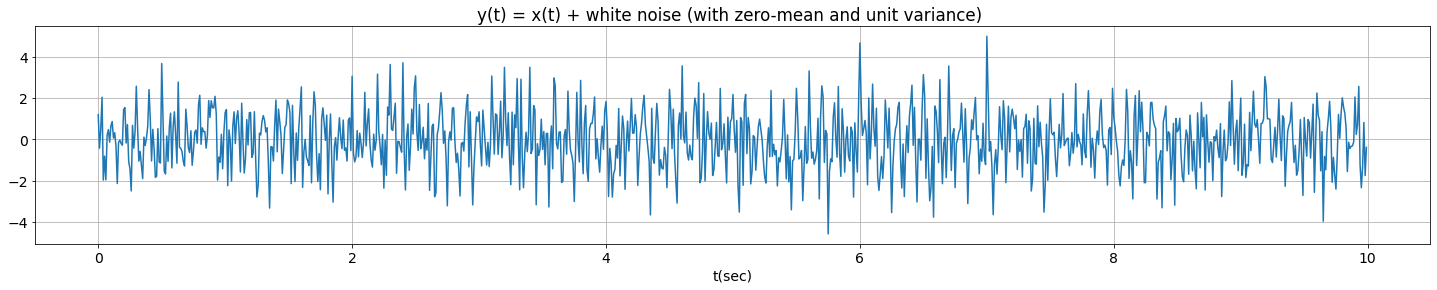

In [112]:
import numpy as np
import matplotlib.pyplot as plt

start=0
end=10
samplesPerSec=100
t=np.arange(start,end,1/samplesPerSec)
f1=10
f2=30
x=np.cos(2*np.pi*f1*t)+np.cos(2*np.pi*f2*t)

# generating white noise and adding it to x
mean = 0
std = 1
num_samples = (end-start)*samplesPerSec
white = np.random.normal(mean, std, size=num_samples)
y=x+white

plt.figure(figsize=(25,4))
plt.plot(t,x)
plt.xlabel('t(sec)')
plt.title(f'x(t) =  cos(2$\pi$ 10 t) + cos(2$\pi$ 30 t) ')
plt.grid()
plt.show()
plt.figure(figsize=(25,4))
plt.plot(t,y)
plt.xlabel('t(sec)')
plt.title(f'y(t) = x(t) + white noise (with zero-mean and unit variance) ')
plt.grid()
plt.show()


(a) Find the power spectral density of y(t) and show a labelled plot.

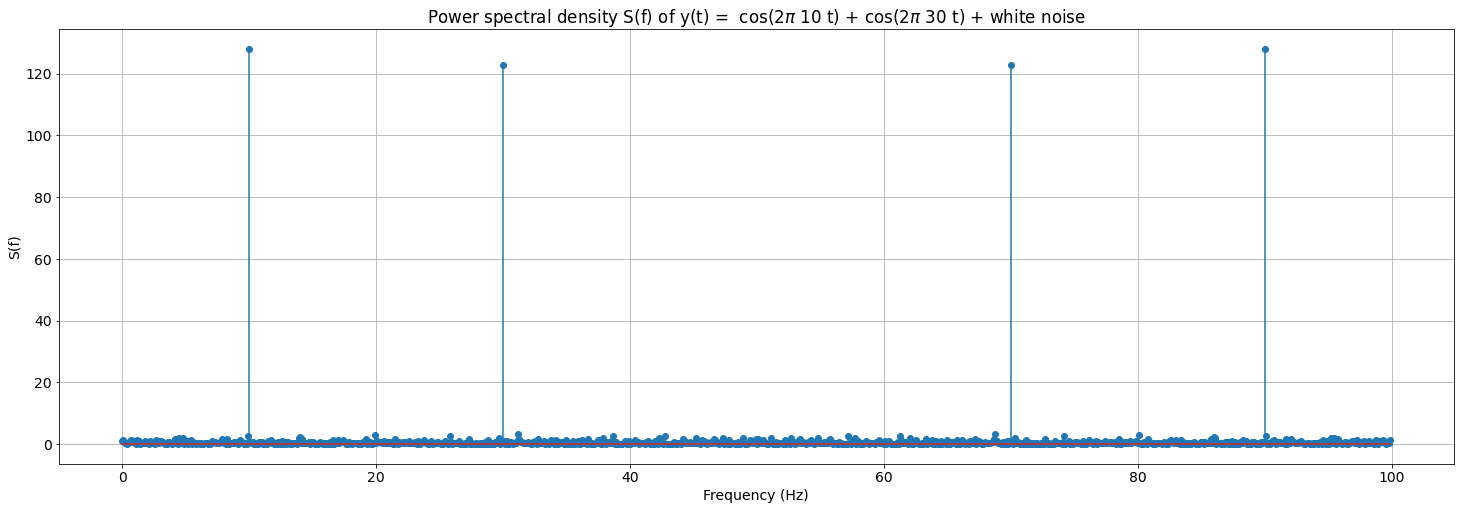

In [113]:

Yk=dft(y,np.shape(y)[0])  # calculate dft of the signal
N=int((end-start)*samplesPerSec)
fs=samplesPerSec

k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=[]
for i in list(k):
  psd.append(abs(Yk[i])**2)
M=0
for i in range(N):
  M=M+(y[i]**2)
M=M/N
psd=np.array(psd)/(N*M)
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
f=(wk*samplesPerSec)/(2*np.pi)
plt.stem(f,psd,use_line_collection=True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('S(f)')
plt.title(f'Power spectral density S(f) of y(t) =  cos(2$\pi$ 10 t) + cos(2$\pi$ 30 t) + white noise')
plt.grid()
plt.show()


(b) From the PSD, find a suitable threshold for denoising the signal.


**Ans** We can choose 20% (approx. 28 in the plot above) of the maximum value of the PSD to be the threshold for filtering the white noise. 

(c) Recover x(t) from y(t) using the threshold. Show the necessary plots.

Mean squared error=0.0045697901898168565


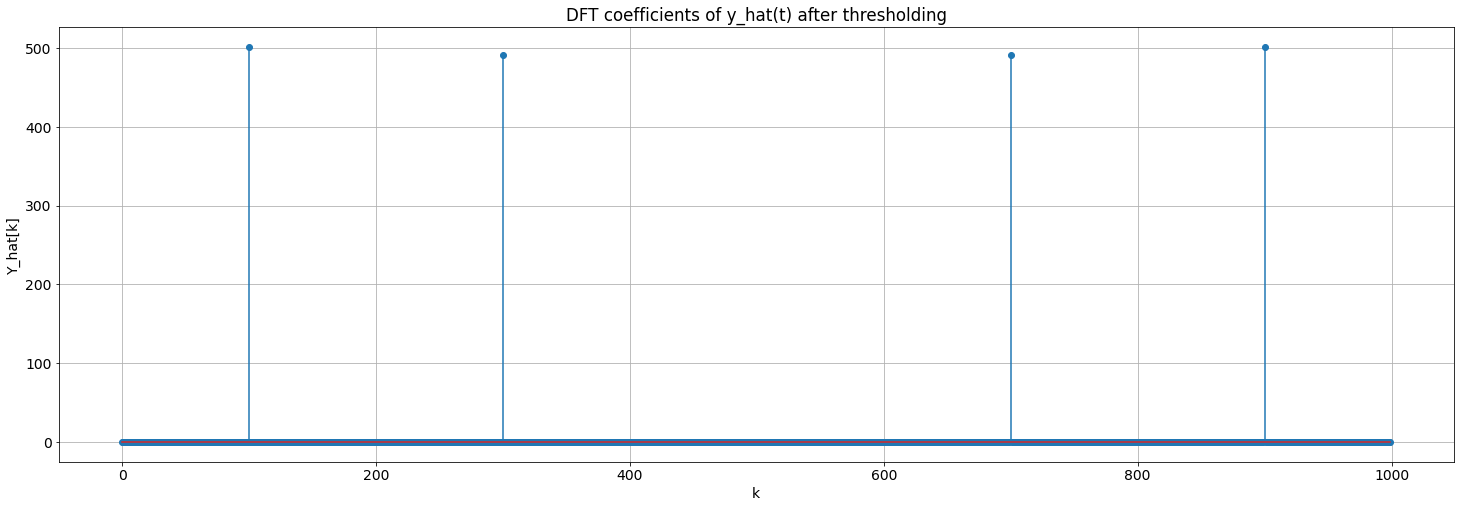

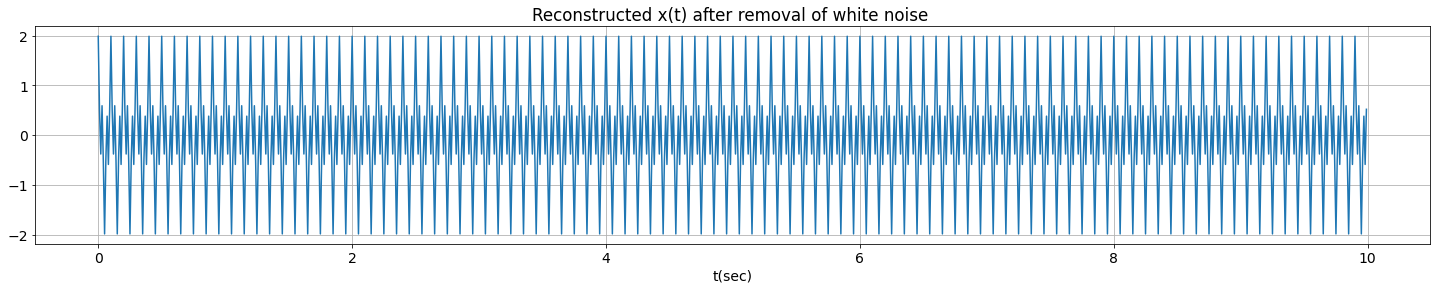

In [115]:
percentage=0.2   # choosing 20 % as the threshold
threshold=np.max(psd)*percentage
Yk_hat=Yk
for i in range(N):
  if(psd[i]<threshold):
    Yk_hat[i]=0   # setting dft coefficients as zero if they fall below the threshold

y_hat=idft(Yk_hat,N)    # reconstructing x(t) from the idft of the modified dft coefficients sequence
error = np.sum(abs(x-y_hat)**2)/N   # calculating mean square error between x(t) and the reconstructed signal
print(f'Mean squared error={error}')

plt.rcParams.update({'font.size':14})
plt.figure(figsize=(25,8))
f=(wk*samplesPerSec)/(2*np.pi)
plt.stem(np.arange(0,1000,1),Yk_hat.real,use_line_collection=True)
plt.xlabel('k')
plt.ylabel('Y_hat[k]')
plt.title(f'DFT coefficients of y_hat(t) after thresholding')
plt.grid()
plt.show()


plt.figure(figsize=(25,4))
plt.plot(t,y_hat.real)
plt.xlabel('t(sec)')
plt.title(f'Reconstructed x(t) after removal of white noise ')
plt.grid()
plt.show()